In [1]:
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
import numpy as np

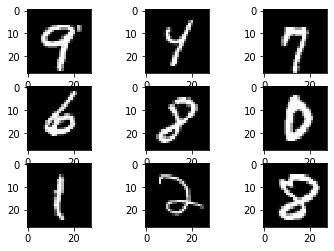

In [125]:
# Construct a tf.data.Dataset
from matplotlib import pyplot as plt
ds = tfds.load('mnist', split='train', shuffle_files=True)

# Build your input pipeline
ds = ds.shuffle(1024).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
dataset = pd.DataFrame()
for i,example in enumerate(ds):
    image, label = example["image"], example["label"].numpy()[0]
    image_array = np.squeeze(image[0].numpy(), axis=2)
    row = pd.DataFrame([image_array, label]).T
    dataset = pd.concat([dataset, row])
    if i < 9:
        ax = plt.subplot(330 + 1 + i)
        plt.imshow(np.squeeze(image_array), cmap=plt.get_cmap('gray'))
        fig.set_title(f"\n{label}")
        
dataset.columns = ['image_array','label']
dataset.index = range(len(dataset))
X = np.concatenate(dataset['image_array'].values).ravel().reshape(-1,28,28)

In [132]:
type(ds)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

9


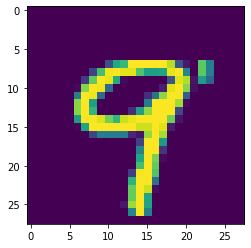

In [128]:
plt.imshow(X[0])
print(dataset.iloc[0].label)

In [84]:
dataset.index = range(len(dataset))
dataset

,image_array,label
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8
...,...,...
1870,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",7
1871,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",6
1872,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",5
1873,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4


In [145]:
from keras.layers import (Input, Concatenate, concatenate,
                          BatchNormalization, Conv2D, Flatten, Dense)

from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint,EarlyStopping

def getCheckPoint(filepath, monitor, verbose=1, mode='min'):
    return ModelCheckpoint(filepath,
                           monitor=monitor,
                           verbose=verbose,
                           save_best_only=True,
                           include_optimizer = False,
                           mode=mode)

def getEarlyStop(monitor, verbose=1, mode='min'):
    return EarlyStopping(monitor=monitor, mode = 'min', patience=5)

# Get get hyper param
early_stop = getEarlyStop('val_loss')
# checkpoint = getCheckPoint('Best_model_with_{val_loss:.5}.model', 'val_loss')

checkpoint = getCheckPoint('Best_model.model', 'val_loss')
InputLayer = Input(shape=dataset['image_array'][0].shape)
hidden = Flatten()(InputLayer)
OutputLayer = Dense(1, activation='sigmoid', input=(28,28))(InputLayer)

model = Model(inputs=InputLayer, outputs=OutputLayer)

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam')

model.summary()

# model.fit(X_Train_pre, y_Train, epochs=5)

# hist = model.fit(X_Train_pre, y_Train,
#                     validation_data=(X_Test_pre, y_Test), #Tuple only
#                     epochs=100,
#                     callbacks = [checkpoint, early_stop],
#                     verbose=2)

TypeError: ('Keyword argument not understood:', 'input')

In [144]:
model.predict(X[0:1])

array([[0.]], dtype=float32)

In [135]:
X[0].shape

(28, 28)

In [102]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [124]:
np.concatenate(dataset['image_array'].values).ravel().reshape(-1,28,28)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [119]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 